In [1]:
from pathlib import Path
import json
import pandas as pd
import numpy as np

import plotly.express as px

import tensorflow.keras.layers as L
import tensorflow as tf

from sklearn.model_selection import train_test_split

2023-08-28 10:49:53.550065: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Setting seeds
tf.random.set_seed(4000)
np.random.seed(4000)

In [3]:
data_dir = Path("stanford-covid-vaccine/")
train = pd.read_json(data_dir / "train.json", lines=True)
test = pd.read_json(data_dir / "test.json", lines=True)
sample = pd.read_csv(data_dir / "sample_submission.csv")

In [4]:
print(f'Train shapes: {train.shape} \nTest shapes: {test.shape}')

Train shapes: (2400, 19) 
Test shapes: (3634, 7)


For further columns details you can see [here](https://www.kaggle.com/competitions/stanford-covid-vaccine/data)

In [5]:
train.head(3)

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."


In [6]:
train.describe()

,index,signal_to_noise,SN_filter,seq_length,seq_scored
count,2400.000000,2400.000000,2400.000000,2400.0,2400.0
mean,1199.500000,4.530456,0.662083,107.0,68.0
std,692.964646,2.835142,0.473099,0.0,0.0
min,0.000000,-0.103000,0.000000,107.0,68.0
25%,599.750000,2.391000,0.000000,107.0,68.0
50%,1199.500000,4.442500,1.000000,107.0,68.0
75%,1799.250000,6.294250,1.000000,107.0,68.0
max,2399.000000,17.194000,1.000000,107.0,68.0


In [7]:
train = train[train['signal_to_noise']>=1].copy() # removing insignificant signals

In [8]:
train.shape

(2097, 19)

In [9]:
# we can remove seq_lengt and seq_scored
train.drop(['index','seq_length','seq_scored'], axis=1, inplace=True)

Creating a character to integers dictionary that we are going to use to covert our RNA sequence, structure, and predictive loop type into integers.

In [10]:
token2int = {x: i for i, x in enumerate("().ACGUBEHIMSX")}
token2int

{'(': 0,
 ')': 1,
 '.': 2,
 'A': 3,
 'C': 4,
 'G': 5,
 'U': 6,
 'B': 7,
 'E': 8,
 'H': 9,
 'I': 10,
 'M': 11,
 'S': 12,
 'X': 13}

In [12]:
def dataframe_to_array(df):
    """Takeing a Pandas data frame and converts it into a 3D NumPy array"""
    return np.transpose(np.array(df.values.tolist()), (0, 2, 1))

In [13]:
def dataframe_label_encoding(df, token2int, cols):
    """Function to tokenize passed columns"""
    return dataframe_to_array(
        df[cols].applymap(lambda seq: [token2int[x] for x in seq])
    ) 

In [14]:
# Columns we want to predict
target_cols = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C', 'deg_pH10', 'deg_50C']

In [15]:
train_inputs = dataframe_label_encoding(train, token2int, ["sequence", "structure", "predicted_loop_type"]) 
train_labels = dataframe_to_array(train[target_cols]) 

In [16]:
# Let's split training data into train and validation sets. We are using signal to noise filter to equally distribute our dataset.
x_train, x_val, y_train, y_val = train_test_split(
    train_inputs, train_labels, test_size=0.2, random_state=34, stratify=train.SN_filter
)

In [45]:
public_test = test.query("seq_length == 107")

In [47]:
public_test_inputs = dataframe_label_encoding(public_test, token2int, cols=["sequence", "structure", "predicted_loop_type"])

In [11]:
def MCRMSE(y_true, y_pred):
    """MCRMSE  (Mean column-wise root mean squared error) performance metric"""
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=1)

## Build the model
This model is influenced by [xhlulu initial models](https://www.kaggle.com/code/xhlulu/openvaccine-simple-gru-model/notebook)

In [17]:
def build_model(
    embed_size,     # Length of unique tokens 
    seq_len=107,    # public dataset seq_len
    pred_len=68,    # pred_len for public data
    dropout=0.5,    # trying best dropout (general)
    sp_dropout=0.2, # Spatial Dropout
    embed_dim=200,  # embedding dimension
    hidden_dim=256, # hidden layer units
):
    inputs = L.Input(shape=(seq_len, 3)) 
    embed = L.Embedding(input_dim=embed_size, output_dim=embed_dim)(inputs)
    reshaped = tf.reshape(
        embed, shape=(-1, embed.shape[1], embed.shape[2] * embed.shape[3])
    )
    hidden = L.SpatialDropout1D(sp_dropout)(reshaped)
     # 3X BiGRU layers
    hidden = L.Bidirectional(
        L.GRU(
            hidden_dim,
            dropout=dropout,
            return_sequences=True,
            kernel_initializer="orthogonal",
        )
    )(hidden)
    hidden = L.Bidirectional(
        L.GRU(
            hidden_dim,
            dropout=dropout,
            return_sequences=True,
            kernel_initializer="orthogonal",
        )
    )(hidden)
    hidden = L.Bidirectional(
        L.GRU(
            hidden_dim,
            dropout=dropout,
            return_sequences=True,
            kernel_initializer="orthogonal",
        )
    )(hidden)
    # Since we are only making predictions on the first part of each sequence,
    # we have to truncate it
    truncated = hidden[:, :pred_len]
    out = L.Dense(5, activation="linear")(truncated)
    model = tf.keras.Model(inputs=inputs, outputs=out)
    model.compile(optimizer="Adam", loss=MCRMSE) # loss function as of Eval Metric
    return model

In [26]:
model = build_model(
    embed_size=len(token2int) ## embed_size = 14
)  ## uniquie token in sequence, structure, predicted_loop_type
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 107, 3)]          0         
                                                                 
 embedding_2 (Embedding)     (None, 107, 3, 200)       2800      
                                                                 
 tf.reshape_2 (TFOpLambda)   (None, 107, 600)          0         
                                                                 
 spatial_dropout1d_2 (Spati  (None, 107, 600)          0         
 alDropout1D)                                                    
                                                                 
 bidirectional_6 (Bidirecti  (None, 107, 512)          1317888   
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 107, 512)          1182

For demonstration purposesWe are going to train our model only for 5 epochs and save the model checkpoint in the Model folder.

In [27]:
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    batch_size=64,
    epochs=5,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(patience=5),
        tf.keras.callbacks.ModelCheckpoint("Model/model.keras"),
    ],
)
model.save("Model/final_model.keras")

Epoch 1/5
27/27 - 141s - loss: 0.4630 - val_loss: 0.3931 - lr: 0.0010 - 141s/epoch - 5s/step
Epoch 2/5
27/27 - 134s - loss: 0.3908 - val_loss: 0.3674 - lr: 0.0010 - 134s/epoch - 5s/step
Epoch 3/5
27/27 - 141s - loss: 0.3719 - val_loss: 0.3527 - lr: 0.0010 - 141s/epoch - 5s/step
Epoch 4/5
27/27 - 114s - loss: 0.3560 - val_loss: 0.3409 - lr: 0.0010 - 114s/epoch - 4s/step
Epoch 5/5
27/27 - 124s - loss: 0.3451 - val_loss: 0.3335 - lr: 0.0010 - 124s/epoch - 5s/step


As we can observe both training and validation loss (MCRMSE) is reducing with every iteration

## Evaluate training history

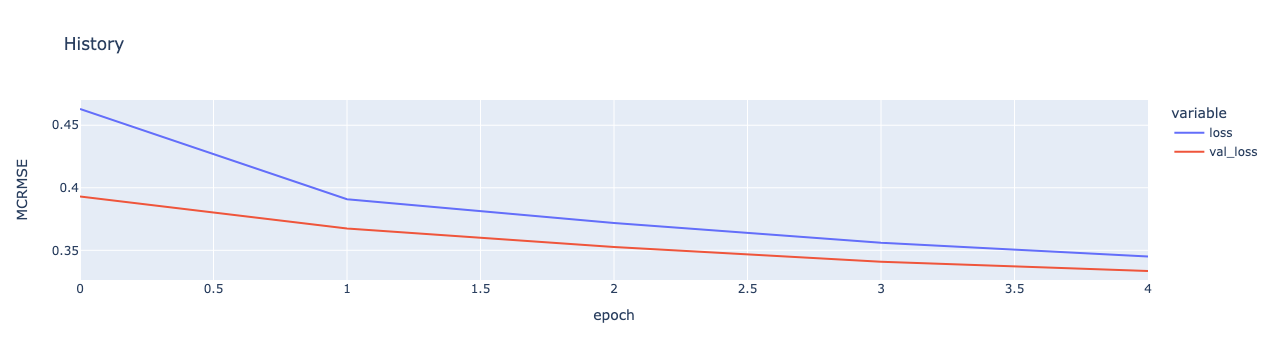

In [28]:
fig = px.line(
    history.history,
    y=["loss", "val_loss"],
    labels={"index": "epoch", "value": "MCRMSE"},
    title="History",
)
fig.show()

## Loading models and making predictions

In [29]:
# Our public model contains 107 sequence lengths
my_model = build_model(seq_len=107, pred_len=107, embed_size=len(token2int))
my_model.load_weights("Model/final_model.keras")

In [52]:
public_preds = my_model.predict(public_test_inputs)

20/20 [==============================] - 9s 431ms/step


* Adding series of integers in front of id based on a sequence of single predictions for example 
* Concatenating all of the data into Pandas Dataframe and preparing for submission

In [54]:
preds_ls = []
for i, uid in enumerate(public_test.id):
    single_pred = public_preds[i]
    single_df = pd.DataFrame(single_pred, columns=target_cols)
    single_df["id_seqpos"] = [f"{uid}_{x}" for x in range(single_df.shape[0])]
    preds_ls.append(single_df)
preds_df = pd.concat(preds_ls)

Merging sample data frame with predicted on id_seqpos to avoid repetition and make sure it follows submission format. Finally, save our data frame into .csv file.

In [60]:
submission = sample[["id_seqpos"]].merge(preds_df, on=["id_seqpos"])
submission.to_csv("Submission/submission.csv", index=False)
submission.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C,deg_pH10,deg_50C
0,id_00073f8be_0,0.741693,0.760946,0.605073,2.317333,0.747031
1,id_00073f8be_1,1.784175,2.548213,2.456062,3.418576,2.085671
2,id_00073f8be_2,1.446854,1.096743,1.446077,1.235880,1.319659
3,id_00073f8be_3,1.146190,0.948444,1.292422,0.989752,1.100187
4,id_00073f8be_4,0.986090,0.970187,1.182399,0.986828,1.039547
